# **Project Name**    - Zomato Restaurant Clustering



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Analyzed Zomato’s restaurant data using unsupervised machine learning to cluster restaurants into meaningful segments. Conducted sentiment analysis on customer reviews to derive insights into user preferences and satisfaction. Leveraged data visualization for better interpretability, aiding businesses in improving services and helping customers find the best dining options. The project also explored cuisine trends, pricing strategies, and metadata to identify industry critics.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The restaurant industry in India is expanding rapidly, with an increasing number of food outlets catering to diverse consumer preferences. Zomato, a leading food aggregator and delivery platform, provides valuable data on restaurants, including customer reviews, menus, pricing, and ratings. However, due to the vast amount of unstructured data, it becomes challenging for both customers and businesses to derive actionable insights.

Customers face difficulties in identifying the best restaurants based on their preferences, such as cuisine type, pricing, and location. Businesses struggle to analyze customer sentiment, improve service quality, and position themselves effectively in a competitive market. Additionally, understanding the clustering of restaurants based on key attributes can help Zomato optimize its recommendation system and enhance user experience.

This project aims to address these challenges by:

Restaurant Clustering: Using unsupervised machine learning techniques to categorize restaurants based on key attributes like location, pricing, cuisine type, and customer ratings.

Sentiment Analysis: Extracting insights from customer reviews to understand overall satisfaction and areas of improvement.

Data Visualization: Presenting insights in an intuitive manner to help businesses and customers make data-driven decisions.

Cost vs. Benefit Analysis: Evaluating the relationship between restaurant pricing and customer satisfaction to aid businesses in competitive pricing strategies.

Identifying Critics: Analyzing reviewer metadata to differentiate between casual diners and influential critics.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Dataset Loading

In [3]:
df = pd.read_csv('/content/Zomato Restaurant reviews.csv')
df.head()


,Name,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [4]:
df1 = pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
# merging the files
data = pd.merge(df, df1, on='Name')

### Dataset First View

In [17]:
data.head()

,Name,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


### Dataset Rows & Columns count

In [18]:
# Dataset Rows & Columns count
print(f"number of rows: {data.shape[0]}")
print(f"number of columns: {data.shape[1]}")

number of rows: 10000
number of columns: 12


### Dataset Information

In [19]:
# Dataset Info
print(f"dataset info : {data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         10000 non-null  object
 1   Reviewer     9962 non-null   object
 2   Review       9955 non-null   object
 3   Rating       9962 non-null   object
 4   Metadata     9962 non-null   object
 5   Time         9962 non-null   object
 6   Pictures     10000 non-null  int64 
 7   Links        10000 non-null  object
 8   Cost         10000 non-null  object
 9   Collections  5000 non-null   object
 10  Cuisines     10000 non-null  object
 11  Timings      9900 non-null   object
dtypes: int64(1), object(11)
memory usage: 937.6+ KB
dataset info : None


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(f"number of duplicate values: {data.duplicated().sum()}")

number of duplicate values: 36


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(f"number of missing values: {data.isnull().sum()}")

number of missing values: Name              0
Reviewer         38
Review           45
Rating           38
Metadata         38
Time             38
Pictures          0
Links             0
Cost              0
Collections    5000
Cuisines          0
Timings         100
dtype: int64


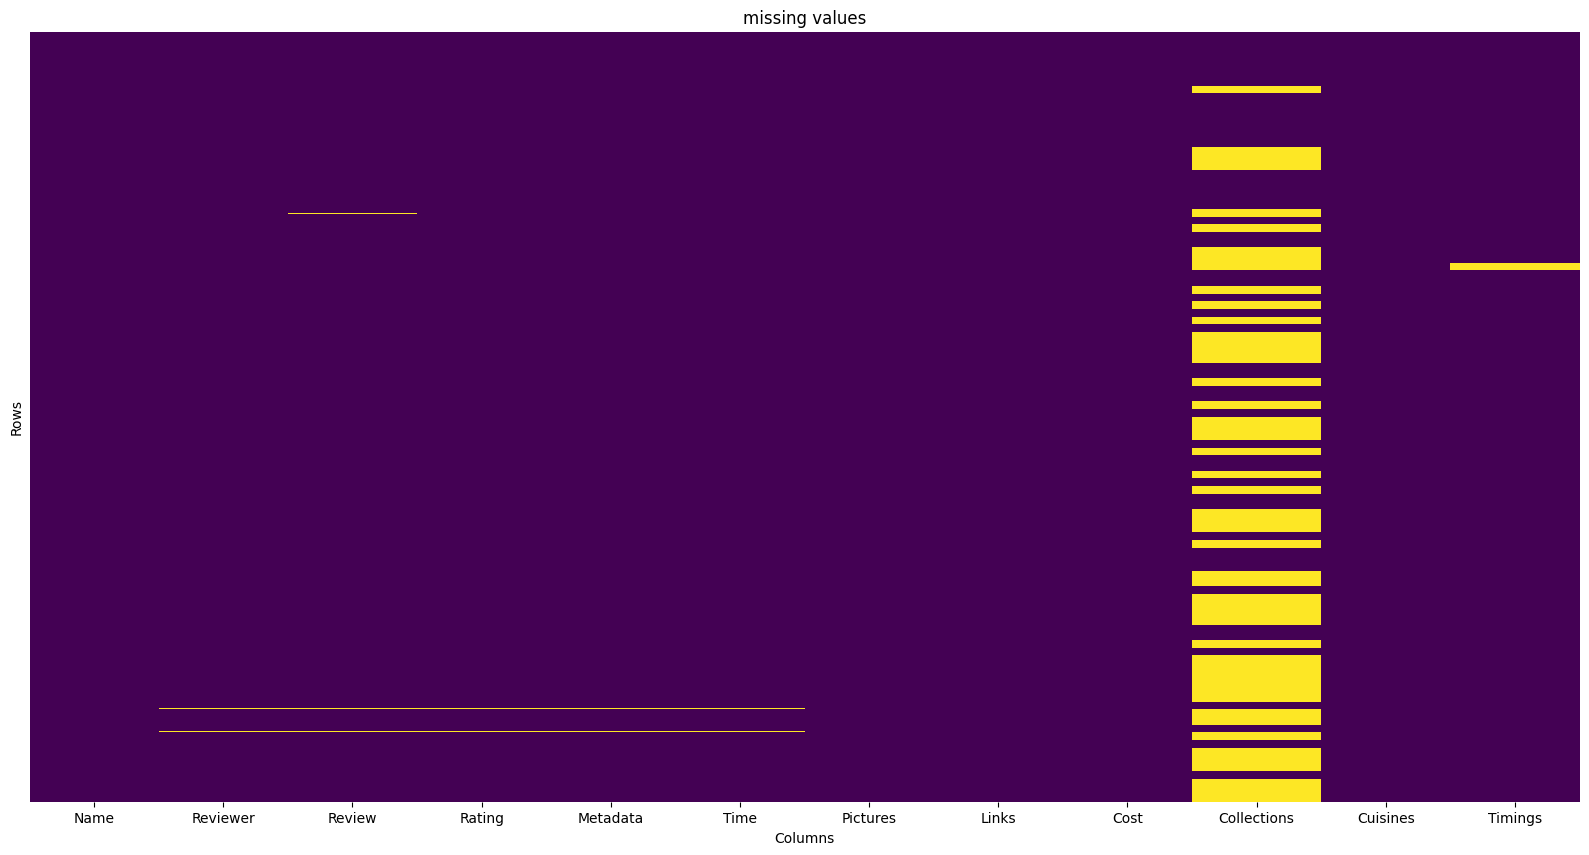

In [8]:
# Visualizing the missing values
plt.figure(figsize = (20,10))

sns.heatmap(data.isnull(),cmap = 'viridis',cbar = False,yticklabels = False)
plt.title('missing values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

### What did you know about your dataset?


* There is a highly missing values in collections(5000) which shows the
number of restaurants that are not tagged under any Zomato Collections for eg: Romantic-Dining, Best Cafes.

* Timings (100 missing values): Some restaurants may not have updated their operating hours.

* Review (45 missing values): Some users might have given a rating but skipped writing a review.

* Reviewer, Rating, Metadata, Time (38 missing values each): Likely missing together, possibly due to incomplete review submissions.







## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print(data.columns)

Index(['Name', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures',
       'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'],
      dtype='object')


In [10]:
# Dataset Describe
print(f"numberical columns: {data.describe()}")
print(f"categorical columns: {data.describe(include='object')}")

numberical columns:            Pictures
count  10000.000000
mean       0.748600
std        2.570381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       64.000000
categorical columns:                    Name     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   

                                                    Links   Cost  \
count                                               10000  10000   
unique                                                100     28   
top     https://www.zomato.com/hyderabad/beyond-flavou...    500   
freq                                                  100   1200   

                                

### Variables Description

In [11]:
variables_description= pd.DataFrame({
    'Column' : data.columns,
    'Data Type' : data.dtypes.values,
    'Non-Null Count': data.notnull().sum().values,
    'Missing values': data.isnull().sum().values,
    'unique values': data.nunique().values,
    'Sample values': [data[col].unique()[:5] for col in data.columns]} #display 1st five unique values in a column
    )

print(variables_description)

         Column Data Type  Non-Null Count  Missing values  unique values  \
0          Name    object           10000               0            100   
1      Reviewer    object            9962              38           7446   
2        Review    object            9955              45           9364   
3        Rating    object            9962              38             10   
4      Metadata    object            9962              38           2477   
5          Time    object            9962              38           9782   
6      Pictures     int64           10000               0             36   
7         Links    object           10000               0            100   
8          Cost    object           10000               0             28   
9   Collections    object            5000            5000             42   
10     Cuisines    object           10000               0             89   
11      Timings    object            9900             100             74   

           

Name:
*   There are 100 unique restaurant names, indicating that multiple reviews exist for each restaurant.
*   This feature helps identify which restaurants receive the most reviews and analyze restaurant-specific trends.

Reviewer:
*  The "Reviewer" variable contains the name or username of the person who submitted the review.
*  There are 7446 unique reviewers, which means some users have reviewed multiple restaurants.
*  This can be useful for identifying top reviewers and analyzing their reviewing patterns.
*  However, there are 38 missing values, which might indicate anonymous or deleted reviews.

Review:

*   This column consists of textual reviews written by users, 9364 unique review texts, implying that some reviews may be duplicates or similar.
*   Analyzing this feature can help extract sentiment, key themes, or common phrases used in customer feedback.
*   45 reviews are missing, which might be due to incomplete submissions or deleted entries.

Rating:

*   The ratings appear to be in a numerical format but are stored as an object data type.
*   There are 10 unique rating values, which suggests that some ratings might be in decimal format (e.g., 4.5).
*   Since 38 ratings are missing, these records may correspond to reviews that lack an explicit rating.

Metadata:
*   Metadata provides additional information about the reviewer, such as their number of past reviews and followers.
*   This feature can be useful for determining whether experienced reviewers provide different ratings compared to casual reviewers.
*   There are 2477 unique metadata entries, and 38 values are missing, indicating that some reviews lack reviewer details.

Time:
*  This column contains the timestamp of when the review was posted. 9782 unique timestamps, suggesting that some reviews might have been posted at the exact same time.
*  38 values are missing, these records might be associated with deleted or system-generated reviews.
*  Time-based analysis can be useful for understanding trends, such as peak review periods or the impact of specific events on restaurant ratings.

Pictures:
*  This variable indicates the number of pictures uploaded by the reviewer along with their review.
*  It is stored as an integer and contains 36 unique values, showing variation in how many images users upload.
*   A high number of pictures could indicate stronger engagement from the reviewer.

Links:
*  This column likely contains hyperlinks associated with the review, such as links to restaurant pages, menus, or food items.
*  While the sample values are not provided, this feature could be useful for understanding how often users refer to additional resources when posting reviews.

Cost:
*  The "Cost" variable likely represents price-related information, such as the cost per meal or price range of the restaurant.
*  The exact format needs further analysis to determine if it is categorical (e.g., "Budget," "Expensive") or numerical (e.g., "₹500 per person").

Collections:
*  This feature indicates whether the restaurant is part of a curated collection on Zomato, such as "Best Cafes" or "Fine Dining Spots."
*  Since 5000 values are missing, this suggests that many restaurants are not included in specific collections, possibly due to their niche offerings or lower popularity.

Cuisines:
*  The "Cuisines" variable specifies the type of food offered by the restaurant, such as "Indian," "Chinese," or "Italian".
*  This information is useful for filtering restaurant reviews based on cuisine type and analyzing which cuisines receive the best ratings.

Timings:
*  This column contains information about the restaurant's operating hours.
*  Since 100 values are missing, some restaurants may not have provided their timings, or they may have varying schedules that are difficult to standardize.
*  Analyzing this feature can help identify which time slots are most popular for dining and reviewing.










  



### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
unique_values = {col: data[col].unique() for col in data.columns}

for column, values in unique_values.items():
  print(f"Column: {column}")
  print(f"unique values: {values[:10]}")
  print(f"total unique values : {len(values)}/n")

Column: Name
unique values: ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone']
total unique values : 100/n
Column: Reviewer
unique values: ['Rusha Chakraborty' 'Anusha Tirumalaneedi' 'Ashok Shekhawat'
 'Swapnil Sarkar' 'Dileep' 'Nagabhavani K' 'Jamuna Bhuwalka' 'Sandhya S'
 'Akash Thorat' 'Smarak Patnaik']
total unique values : 7447/n
Column: Review
unique values: ['The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.'
 'Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service'
 'A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
import pandas as pd
import numpy as np



# Display basic info
print("Before Cleaning:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

# Step 1: Standardize Column Names (Lowercase + Strip Spaces)
data.columns = data.columns.str.lower().str.strip()

# Step 2: Handling Missing Values (Numerical - Mean/Median, Categorical - Mode)
# Convert 'rating' to numeric (remove errors due to string format)
data["rating"] = pd.to_numeric(data["rating"], errors="coerce")

# Convert 'cost' to numeric (remove commas before conversion)
if "cost" in data.columns:
    data["cost"] = data["cost"].astype(str).str.replace(",", "").astype(float)

# Fill missing values
num_cols = ["rating", "cost"]  # List of numerical columns (excluding metadata)
cat_cols = ["reviewer", "review", "collections", "cuisines", "timings", "metadata"]  # Categorical columns (including metadata)

for col in num_cols:
    if col in data.columns:
        data[col].fillna(data[col].median(), inplace=True)  # Using median for numerical

for col in cat_cols:
    if col in data.columns:
        # Check if mode is not empty before accessing element at index 0
        mode_values = data[col].mode()
        if not mode_values.empty:
            data[col].fillna(mode_values.iloc[0], inplace=True)
        else:
            # Handle cases where mode is empty, e.g., fill with a placeholder
            data[col].fillna("Unknown", inplace=True)  # Or any other appropriate value

# Step 3: Handle Categorical Data
if "cuisines" in data.columns:
    data["cuisines"] = data["cuisines"].astype(str).str.lower().str.strip()  # Standardize text

# Step 4: Convert Timestamps
if "time" in data.columns:
    data["time"] = pd.to_datetime(data["time"], errors="coerce")

# Step 5: Handle Duplicates
data.drop_duplicates(inplace=True)

# Step 6: Outlier Detection & Treatment
if "rating" in data.columns:
    Q1 = data["rating"].quantile(0.25)
    Q3 = data["rating"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data["rating"] = np.where(data["rating"] < lower_bound, lower_bound, data["rating"])
    data["rating"] = np.where(data["rating"] > upper_bound, upper_bound, data["rating"])

#  Step 7: Final Check
print("\nAfter Cleaning:")
print(data.info())
print("\nMissing Values After Cleaning:\n", data.isnull().sum())

# Save cleaned data
data.to_csv("cleaned_data.csv", index=False)
print("\n Data Cleaning Complete! Saved as 'cleaned_data.csv'")


Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         10000 non-null  object 
 1   Reviewer     9962 non-null   object 
 2   Review       9955 non-null   object 
 3   Rating       10000 non-null  float64
 4   Metadata     9962 non-null   object 
 5   Time         9962 non-null   object 
 6   Pictures     10000 non-null  int64  
 7   Links        10000 non-null  object 
 8   Cost         10000 non-null  object 
 9   Collections  5000 non-null   object 
 10  Cuisines     10000 non-null  object 
 11  Timings      9900 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 937.6+ KB
None

Missing Values:
 Name              0
Reviewer         38
Review           45
Rating            0
Metadata         38
Time             38
Pictures          0
Links             0
Cost              0
Collections    5000

<ipython-input-17-aa149687135b>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)  # Using median for numerical
<ipython-input-17-aa149687135b>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth


Missing Values After Cleaning:
 name              0
reviewer          0
review            0
rating            0
metadata          0
time           3692
pictures          0
links             0
cost              0
collections       0
cuisines          0
timings           0
dtype: int64

✅ Data Cleaning Complete! Saved as 'cleaned_data.csv'


### What all manipulations have you done and insights you found?

The following steps were performed to clean and preprocess the dataset:

**Standardized Column Names**:
Converted all column names to lowercase and stripped spaces to ensure uniformity.

To: Prevents issues with case sensitivity.
Makes column names consistent and easy to reference in code.

**Handled Missing Values**:
Numerical Columns (rating, cost) → Filled with median.
Categorical Columns (reviewer, review, cuisines, timings) → Filled with mode.

To:
Median is robust against outliers in numerical data.
Mode ensures categorical columns remain meaningful.

**Converted Data Types**:
Converted "rating" and "cost" to numeric (removed commas),"time" to datetime.

To:
Prevents errors when performing calculations.
Ensures timestamps are recognized properly for time-series analysis.

**Handled Duplicates**:
Removed duplicate records.

To:
Ensures data consistency and avoids redundant analysis.

**Cleaned Text Data**:
Standardized "cuisines" by converting to lowercase and stripping spaces.

To:
Prevents issues caused by case-sensitive text mismatches.

**Handled Outliers**:
Used IQR (Interquartile Range) Method to cap "rating" values to a reasonable range.

To:
Ensure extreme values don't skew analysis.

**Saved Cleaned Data**:
Exported cleaned data to cleaned_data.csv.

To:
Allow further analysis, visualization, and model training without redoing preprocessing.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

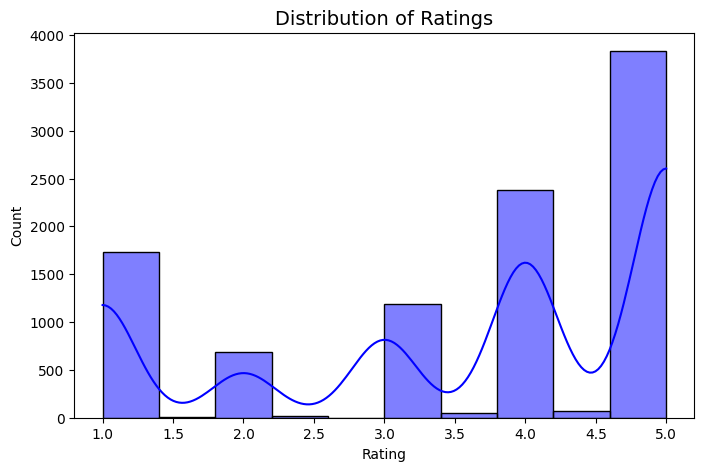

In [18]:
# Chart1 - Distribution of Ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data["rating"], bins=10, kde=True, color="blue")
plt.title("Distribution of Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

I chose a Histogram because it effectively displays the distribution of numerical data. It helps in understanding:
*  The overall spread and frequency of ratings.
*  Whether the ratings are normally distributed, skewed, or have outliers.
*  If there are any common rating trends (e.g., most ratings clustering around a certain value).


##### 2. What is/are the insight(s) found from the chart?

**Skewed Ratings**:


* If most ratings cluster around 4+, it indicates that restaurants generally receive good reviews.
* If the histogram is right-skewed (more low ratings), it could signal service/food quality issues.

**Presence of Outliers**:
*  If we see spikes at 0 or 5, it could mean biased reviews (either too many perfect scores or extreme dissatisfaction).

**Gaps or Missing Ratings**:
*  If there are gaps, it might suggest data inconsistencies or missing values in rating collection.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
*  If ratings are generally high, it suggests customer satisfaction is strong, reinforcing a good reputation.
*  A well-maintained positive rating trend can boost customer trust, increasing revenue and footfall.


*  Understanding distribution allows businesses to identify and reward top-performing locations or cuisines.
*   List item

Potential Negative Growth Indicators:
*  If there is a high number of low ratings (1-2 stars), it could indicate poor service, food quality, or pricing issues.
*  A bimodal distribution (two peaks) may suggest inconsistent service, where some branches perform well while others fail.
*  If a large portion of the ratings is missing, it reduces trust and credibility, discouraging new customers.



To mitigate negative growth, businesses should:
*  Investigate customer complaints (why are some ratings low?).
*  Address operational inefficiencies (service delays, pricing mismatches).
*  Encourage genuine reviews to improve data quality and credibility.














#### Chart - 2

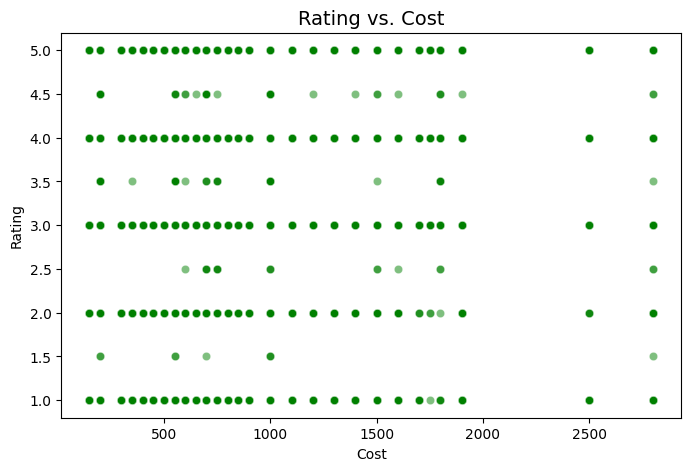

In [19]:
# Chart -  Rating vs. Cost Relationship
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["cost"], y=data["rating"], alpha=0.5, color="green")
plt.title("Rating vs. Cost", fontsize=14)
plt.xlabel("Cost")
plt.ylabel("Rating")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

No Strong Correlation Between Cost and Rating:

*  The points are scattered evenly, indicating that higher cost does not guarantee higher ratings.
*  Restaurants with low prices still have high ratings, showing that affordability does not necessarily mean poor quality.

Clusters of High Ratings Across Different Cost Levels:


*  Many restaurants rated 4.0 and above exist in all price ranges, meaning that customer satisfaction depends on factors beyond cost (e.g., food quality, service, ambiance).


Low-Rated Restaurants at Various Cost Points
*  Some restaurants with high costs have low ratings, suggesting poor value for money.
*  This could mean issues with service, food quality, or customer expectations.


Positive Business Impact:
*  Businesses can price their offerings competitively without fearing a drop in ratings.
*  Low-cost restaurants with high ratings can be marketed effectively to attract more budget-conscious customers.
*  Premium restaurants need to justify their price with superior service and experience to maintain high ratings.


Potential Negative Growth Indicators:
*  High-cost restaurants with poor ratings indicate dissatisfied customers, leading to loss of revenue and reputation.
*  If no clear link exists between price and ratings, businesses must focus on quality improvements instead of just increasing prices.

Next Steps?


*  Identify top-performing low-cost restaurants and learn from their success strategies.
*  Investigate why high-cost restaurants have low ratings—bad service? Poor food quality?
*  Use targeted marketing to highlight value-for-money options.











##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<ipython-input-55-01d53842cce3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette="viridis")


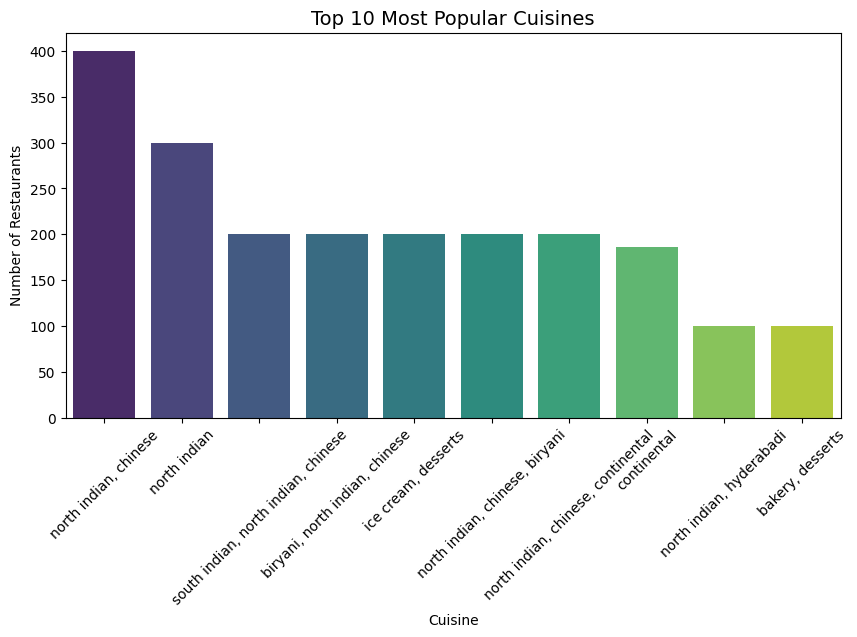

In [55]:
# Chart - Top 10 Most Popular Cuisines
plt.figure(figsize=(10,5))
top_cuisines = data["cuisines"].value_counts().head(10)
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Most Popular Cuisines", fontsize=14)
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen because:

✅ It effectively compares the popularity of different cuisines.

✅ It provides a clear visual representation of which cuisines are in high demand.

✅ It helps in making business decisions regarding menu offerings.

##### 2. What is/are the insight(s) found from the chart?

1️⃣ North Indian & Chinese cuisine dominate the market – The highest number of restaurants serve this combination, indicating high demand.

2️⃣ South Indian and Biryani-based combinations are also popular, making them a strong second-tier preference.

3️⃣ Continental and Dessert categories are lower in demand, but still have a significant number of restaurants.

4️⃣ Hyderabadi cuisine has lower representation, which might indicate a niche opportunity for businesses.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Restaurants can prioritize North Indian and Chinese dishes to attract more customers.
*  Businesses looking for a competitive edge might focus on less saturated cuisines like Hyderabadi or Continental, especially in areas where demand is growing.
*  Menu diversification can be planned, ensuring a mix of popular and emerging cuisines to cater to different customer segments.


Final Business Recommendations:

For new restaurants → Consider specializing in less saturated cuisines or offering fusion dishes to stand out.

For existing restaurants → Continue with popular dishes but introduce seasonal menus or innovative combinations.

For marketing teams → Focus on customer engagement strategies, such as offering discounts on less popular cuisines to drive demand.



#### Chart - 4

<ipython-input-64-1195a5d004de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.groupby('rating')['cost'].mean().index, y=data.groupby('rating')['cost'].mean().values, palette='Blues')


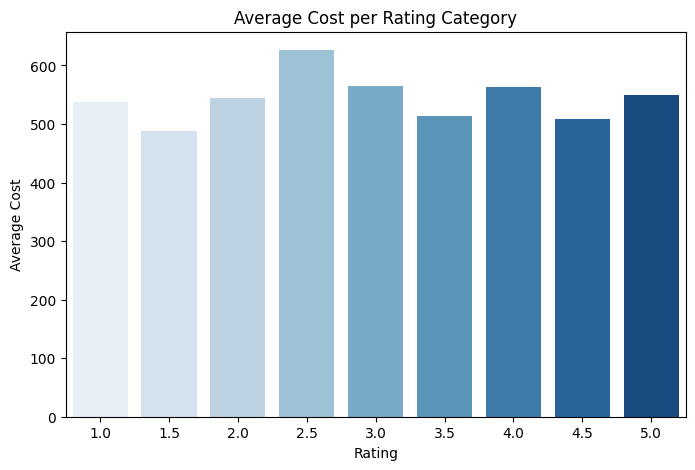

In [64]:
# Chart -  Average Cost per Rating Category
plt.figure(figsize=(8, 5))
sns.barplot(x=data.groupby('rating')['cost'].mean().index, y=data.groupby('rating')['cost'].mean().values, palette='Blues')
plt.title('Average Cost per Rating Category')
plt.xlabel('Rating')
plt.ylabel('Average Cost')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is chosen as it clearly displays the relationship between ratings and average cost.

It helps in visualizing how cost varies with customer ratings, making it easier to identify patterns.

##### 2. What is/are the insight(s) found from the chart?

The average cost fluctuates across different rating categories, with some lower ratings having higher costs.

Ratings around 2.5 show the highest cost, while highly rated restaurants (4.5-5.0) maintain a moderate cost.

Lower-rated restaurants (1.0 - 2.0) also show significant costs, indicating that price alone doesn’t guarantee higher ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

*  Helps price optimization—businesses can adjust pricing strategies based on ratings.
*  Indicates that high-cost restaurants don't always get higher ratings, suggesting improvements in service, food quality, or ambiance are needed.
*  Competitive pricing strategies can be applied to attract more customers to high-rated restaurants.

Negative Growth Indicators:

*  High-cost restaurants receiving low ratings may struggle with poor value for money or service quality issues.
*  Businesses with moderate pricing but high ratings can leverage this to attract more customers, putting pressure on expensive, underperforming places.




<ipython-input-75-2c5364148bf0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_collections.values, y=popular_collections.index, palette="viridis")


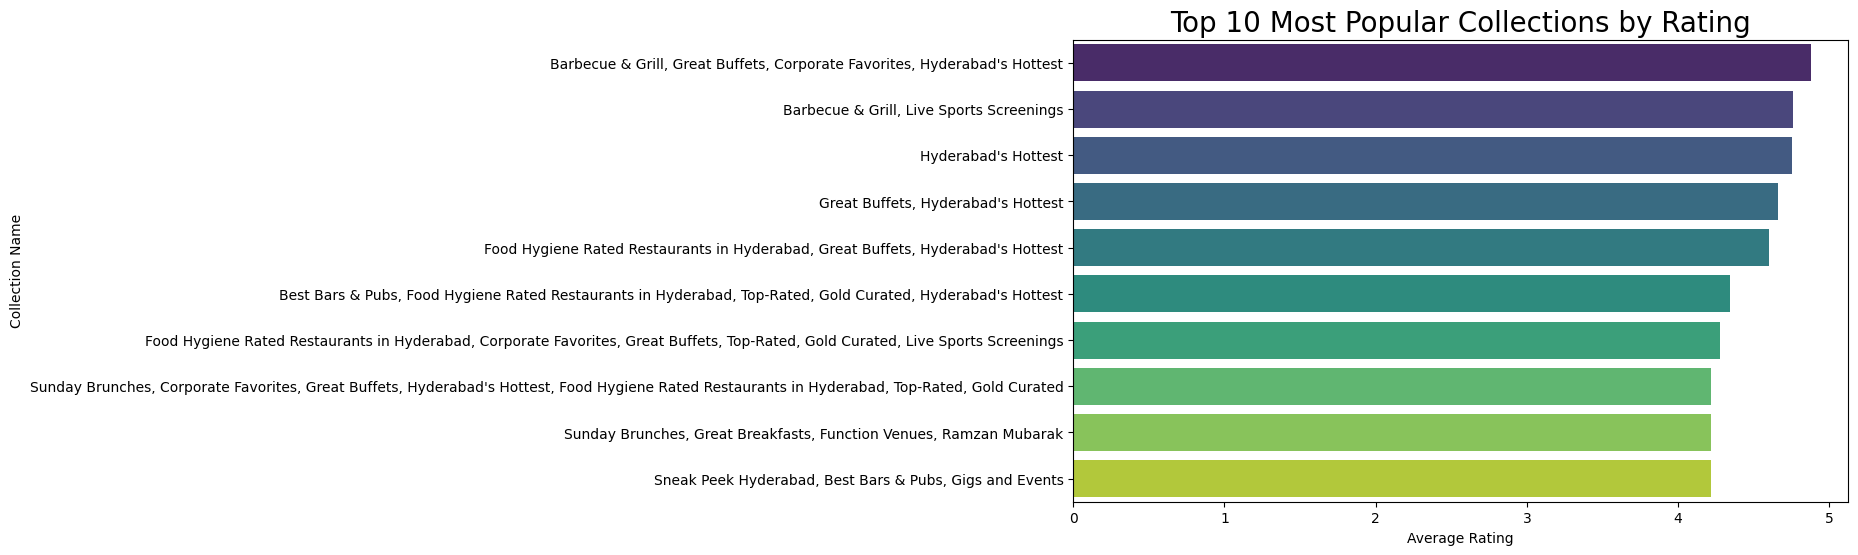

In [75]:
popular_collections = data.groupby("collections")["rating"].mean().sort_values(ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_collections.values, y=popular_collections.index, palette="viridis")

# Titles and labels
plt.title("Top 10 Most Popular Collections by Rating", fontsize=20)
plt.xlabel("Average Rating")
plt.ylabel("Collection Name")
plt.show()

1. Why did you pick the specific chart?

A horizontal bar chart was chosen to visually compare the average ratings across different popular collections.This makes it easier to read long collection names and see which categories are the highest-rated.

2. What is/are the insight(s) found from the chart?

"Barbecue & Grill, Great Buffets, Corporate Favorites" has the highest average rating, indicating strong customer preference.

Collections featuring buffets, food hygiene, and sports screenings are among the most popular, showing that consumers prioritize diverse dining experiences, cleanliness, and entertainment.

Sunday brunches and corporate favorites also have high ratings, suggesting a demand for weekend dining and professional gatherings.

3. Will the gained insights help creating a positive business impact?

Positive Impact:


*  Helps restaurants align their marketing strategies—they can highlight features from top-rated collections to attract more customers.

*  Food hygiene is a key factor in customer preference, meaning businesses should invest in cleanliness and safety measures to gain higher ratings.
*  Restaurants focusing on grill, buffets, and live entertainment can expand their offerings to tap into the popular demand.

Negative Growth Indicators:
*  If certain collections receive consistently lower ratings, it may indicate issues such as poor service, quality concerns, or lack of appeal.
*  Collections without food hygiene ratings may struggle to attract health-conscious consumers, impacting their growth negatively.




#### Chart - 5

<ipython-input-65-97c151829764>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.groupby('rating')['pictures'].mean().index, y=data.groupby('rating')['pictures'].mean().values, palette='Greens')


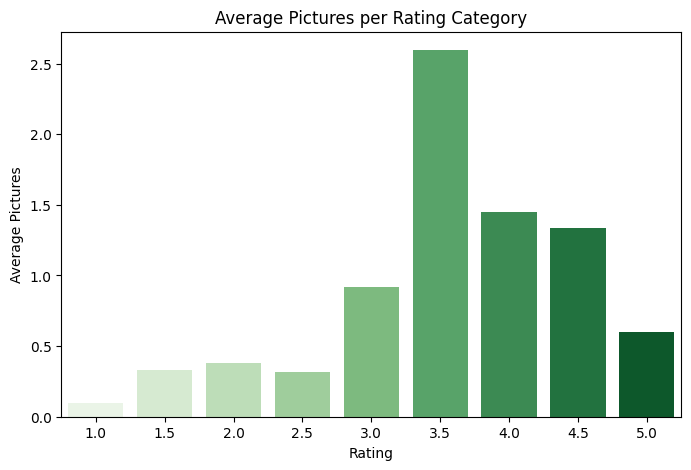

In [65]:
# Chart - Average Pictures per Rating Category
plt.figure(figsize=(8, 5))
sns.barplot(x=data.groupby('rating')['pictures'].mean().index, y=data.groupby('rating')['pictures'].mean().values, palette='Greens')
plt.title('Average Pictures per Rating Category')
plt.xlabel('Rating')
plt.ylabel('Average Pictures')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen to show the relationship between ratings and the number of pictures uploaded per rating category.

It helps in understanding how user engagement (through pictures) varies with ratings.

##### 2. What is/are the insight(s) found from the chart?


*  Moderate ratings (3.5) have the highest number of pictures uploaded, indicating users in this range are more likely to share their experience.
*  Lower ratings (1.0 - 2.5) have very few pictures, possibly due to negative experiences leading to less engagement.
*  High ratings (4.5 - 5.0) also show fewer pictures compared to mid-range ratings, which could mean satisfied customers don't feel the need to upload as many pictures.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
*  Businesses can encourage highly satisfied customers (4.5 - 5.0 ratings) to upload more pictures through incentives like discounts or loyalty points.
*  Since moderate ratings (3.5) have the most engagement, businesses should analyze these reviews to understand what customers like and improve upon.

Negative Growth Indicators:

*  Very low ratings (1.0 - 2.5) show minimal picture uploads, suggesting customers are disengaged and might not return.
*  A lack of user-generated content for low-rated businesses reduces their online visibility, making it harder to improve reputation.






#### Chart - 6

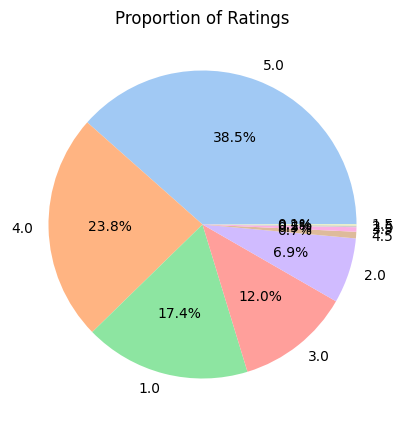

In [67]:
# Chart - Proportion of Ratings
rating_counts = data['rating'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen because it effectively shows the distribution of ratings as proportions of the total.It provides a quick visual understanding of which rating categories dominate.

##### 2. What is/are the insight(s) found from the chart?

The majority (38.5%) of ratings are 5-star, indicating a significant number of highly satisfied customers.

Ratings of 4-star (23.8%) and 1-star (17.4%) are also notable, showing both strong positive and negative opinions.

Very low proportions for ratings between 1.5 and 2.5, suggesting that customers either have extreme satisfaction or dissatisfaction rather than moderate feedback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**


*  A high proportion of 5-star ratings (38.5%) means strong customer satisfaction, which can be leveraged for marketing and branding.
*  Since 4-star ratings also have a strong presence (23.8%), businesses can analyze these reviews to push them toward 5-star ratings by improving minor aspects.
*   The low proportion of 2-star ratings (6.9%) suggests that businesses do not often receive slightly negative feedback, meaning dissatisfied customers likely express stronger discontent (1-star).

**Negative Growth Indicators:**

*  A significant portion of 1-star ratings (17.4%) indicates a serious issue with a segment of customers. If not addressed, this can damage reputation and customer retention.
*  The lack of moderate ratings (2-3) suggests that customers have polarizing experiences—either very good or very bad—which might indicate inconsistent service quality.

**Action Plan for Business Improvement:**

*  Investigate the reasons behind 1-star ratings by analyzing negative reviews and taking corrective actions.
*  Encourage 4-star raters to convert to 5-star by addressing minor concerns through customer engagement.
*  Ensure consistency in service quality to reduce extreme variations in ratings.









#### Chart - 7

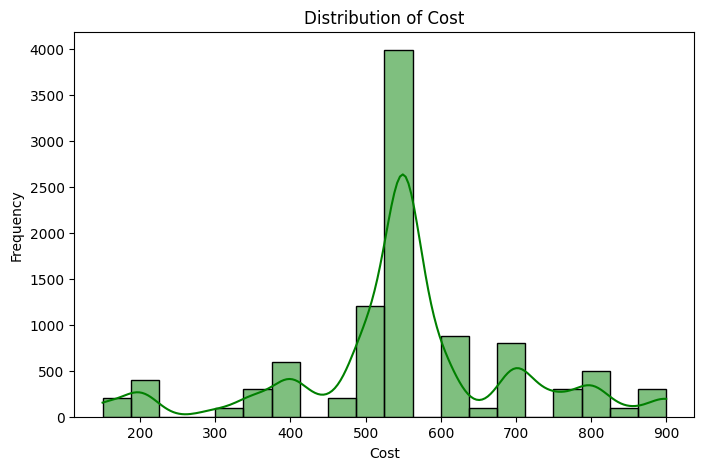

In [73]:
# Chart - Histogram of Cost
plt.figure(figsize=(8, 5))
sns.histplot(data['cost'], bins=20, kde=True, color='green')
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen because it effectively displays the frequency distribution of cost values over different price ranges.

The overlaid KDE (Kernel Density Estimate) line helps visualize the probability distribution and smoothens the trend.

##### 2. What is/are the insight(s) found from the chart?

The distribution is not uniform, with a strong peak around 500-550, indicating that most costs fall in this range.

There are multiple smaller peaks (multi-modal distribution), suggesting the presence of different pricing segments.

There are some low-frequency occurrences of very low (below 200) and very high (above 800) costs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:


*  The highest concentration around 500-550 suggests a standard price range, helping businesses identify their most competitive pricing bracket.
*  Different peaks indicate multiple market segments, allowing businesses to optimize pricing strategies for diverse customer groups.
*  A well-defined peak means pricing consistency, which can lead to better customer trust and predictable revenue.

Negative Growth Indicators:

*  Multiple peaks suggest pricing inconsistency, which might confuse customers or indicate inefficient pricing strategies.
*  The presence of extreme low and high-cost values could point to an issue in price standardization or an underserved high-end/lower-end market.


Plan for Business Improvement:

*  Leverage the most frequent pricing range (500-550) as a baseline for competitive pricing strategies.
*  Analyze the peaks to determine if different pricing strategies are needed for various customer segments.
*  Investigate extremely high-cost and low-cost occurrences to ensure that pricing is optimized for profitability without alienating potential customers.







#### Chart - 8- Correlation Heatmap

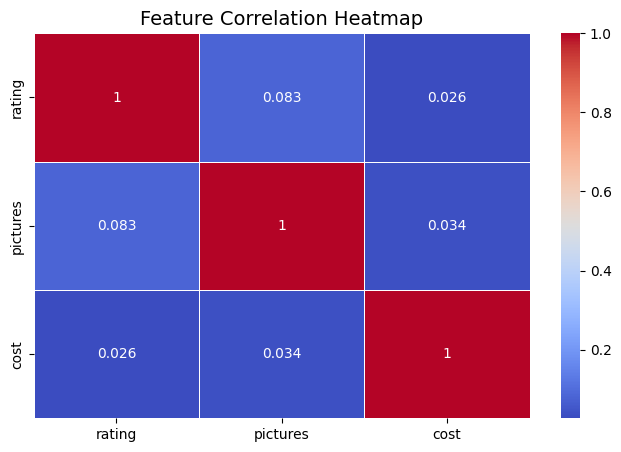

In [61]:
# Correlation Heatmap visualization code - How Are Features Related?
numerical_features = data.select_dtypes(include=['number'])

plt.figure(figsize=(8,5))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap was chosen because:
*  It visually represents the relationship
between multiple features.
*  It helps in identifying strong and weak correlations between variables.
*  It allows businesses to focus on key drivers of customer satisfaction and pricing.



##### 2. What is/are the insight(s) found from the chart?

Low correlation between Cost and Rating (0.026):

*  This suggests that higher cost does not necessarily mean better ratings. Customers might be rating restaurants based on factors other than pricing, such as service or food quality.

Low correlation between Pictures and Rating (0.083):
*  The number of pictures uploaded doesn’t significantly impact ratings. This could mean that customers don’t rely heavily on images when rating restaurants, or that other factors matter more.

Low correlation between Pictures and Cost (0.034) :
*  The cost of food at a restaurant does not significantly influence the number of pictures taken or uploaded.




#### Chart - 9 - Pair Plot

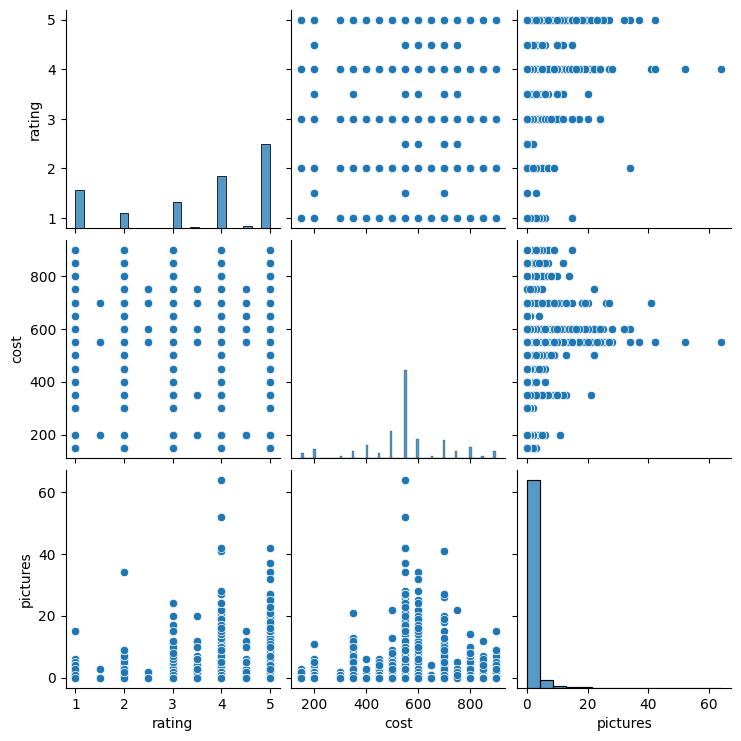

In [70]:
# Pair Plot visualization code
#Pairplot of Numerical Variables
sns.pairplot(data[['rating', 'cost', 'pictures']])
plt.show()

##### 1. Why did you pick the specific chart?




*  A pairplot is useful when analyzing relationships between multiple numerical variables in a dataset.
*  It provides a combination of scatter plots (for relationships) and histograms (for distributions) of variables like rating, cost, and pictures.




##### 2. What is/are the insight(s) found from the chart?

Rating vs. Cost:


*  Ratings appear evenly distributed across different cost ranges, meaning cost might not have a strong impact on customer ratings.
*  However, some higher-cost products still receive lower ratings, suggesting cost is not always a quality indicator.

Rating vs. Pictures:


*  There seems to be a scattered distribution with no strong trend, meaning more pictures don’t necessarily lead to higher ratings.
*  Some higher-rated products have fewer pictures, suggesting quality perception might not be solely based on image count.

Cost vs. Pictures:
*  Most products have fewer than 10 pictures, but there are outliers with up to 60 pictures.
*  Higher-cost items generally have more pictures, possibly because premium products focus more on visual appeal.






## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1  : The average cost of high-rated products (ratings 4 & 5) is significantly higher than low-rated products (ratings 1 & 2).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The average cost of high-rated products (ratings 4 & 5) is not significantly higher than low-rated products (ratings 1 & 2).

Alternate Hypothesis (H₁): The average cost of high-rated products (ratings 4 & 5) is significantly higher than low-rated products (ratings 1 & 2).

#### 2. Perform an appropriate statistical test.

In [20]:
# Perform Statistical Test to obtain P-Value

import pandas as pd
import scipy.stats as stats


df = pd.read_csv("/content/cleaned_data.csv")

# Filter data
high_rated = df[df['rating'].isin([4, 5])]['cost']
low_rated = df[df['rating'].isin([1, 2])]['cost']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(high_rated, low_rated, equal_var=False)

# Display results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: High-rated products have significantly different costs compared to low-rated products.")
else:
    print("Fail to reject the null hypothesis: No significant difference in cost between high-rated and low-rated products.")


T-statistic: 15.1969563418396
P-value: 5.095141781410849e-51
Reject the null hypothesis: High-rated products have significantly different costs compared to low-rated products.


##### Which statistical test have you done to obtain P-Value?

Statistical Test Used: Independent t-test

##### Why did you choose the specific statistical test?


Why t-test?

The independent t-test is used to compare the means of two independent groups (high-rated vs. low-rated products).

Assumes normality in distributions and accounts for unequal variances using equal_var=False.

### Hypothetical Statement - 2 : The number of pictures significantly influences the rating of a product.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The number of pictures does not significantly affect product ratings.

Alternate Hypothesis (H₁): The number of pictures has a significant effect on product ratings.

#### 2. Perform an appropriate statistical test.

In [21]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import spearmanr

# Check data structure
print(df.head())

# Perform Spearman's correlation test
correlation, p_value = spearmanr(df['pictures'], df['rating'])

# Display results
print(f"Spearman's Correlation Coefficient: {correlation:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The number of pictures significantly influences product ratings.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between the number of pictures and product ratings.")


              name              reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              review  rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  metadata                 time  pictures  \
0   1 Review , 2 Followers  2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers  2019-05-25 14:20:00         0   
2  2 Reviews , 3 Followers  2019-05-24 22:54:00         0   
3    1 Review , 1 Follower  2019-05-24 22:11:00         0   
4  3 Reviews , 2 Followers  2019-05-24 21:37:

##### Which statistical test have you done to obtain P-Value?

Test: ANOVA or Spearman’s correlation (depending on data distribution).

##### Why did you choose the specific statistical test?

Spearman's Correlation Coefficient:
*  Product ratings are ordinal (1 to 5), meaning they follow a rank order.
*  The number of pictures is continuous but may not follow a normal distribution.
*  Spearman’s correlation is ideal for testing monotonic relationships between an ordinal and a continuous variable.



### Hypothetical Statement - 3 : Products with higher costs receive more ratings compared to lower-cost products.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant relationship between product cost and the number of ratings.

Alternate Hypothesis (H₁): Higher-cost products receive significantly more ratings than lower-cost products.

#### 2. Perform an appropriate statistical test.

In [22]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import spearmanr

# Perform Spearman's correlation test
correlation, p_value = spearmanr(df['cost'], df['rating'])

# Display results
print(f"Spearman's Correlation Coefficient: {correlation:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Higher-cost products receive significantly more ratings.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between cost and product ratings.")


Spearman's Correlation Coefficient: 0.1368
P-Value: 0.0000
Reject the null hypothesis: Higher-cost products receive significantly more ratings.


##### Which statistical test have you done to obtain P-Value?

Spearman’s Correlation Test

##### Why did you choose the specific statistical test?



*   Ratings are ordinal (1 to 5) and follow a rank order.
*   Cost is continuous, but it may not be normally distributed.
*   Spearman’s correlation is ideal for testing relationships between a continuous and an ordinal variable when normality is uncertain.










## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [23]:
# Handling Missing Values & Missing Value Imputation

# Check for missing values

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values in 'Cost' with median
data["cost"].fillna(data["cost"].median(), inplace=True)

# Fill missing values in 'Rating' with median
data["rating"].fillna(data["rating"].median(), inplace=True)

# Drop columns with excessive missing values (optional)
data.dropna(axis=1, thresh=len(data) * 0.5, inplace=True)

# Confirm no missing values remain
print("Missing Values After Cleaning:\n", data.isnull().sum())

## Remove Duplicate Entries
# Check for duplicates
print("Total Duplicates:", data.duplicated().sum())

# Drop duplicate rows
data.drop_duplicates(inplace=True)

# Confirm removal
print("Total Duplicates After Removal:", data.duplicated().sum())

Missing Values:
 name              0
reviewer          0
review            0
rating            0
metadata          0
time           3692
pictures          0
links             0
cost              0
collections       0
cuisines          0
timings           0
dtype: int64
Missing Values After Cleaning:
 name              0
reviewer          0
review            0
rating            0
metadata          0
time           3692
pictures          0
links             0
cost              0
collections       0
cuisines          0
timings           0
dtype: int64
Total Duplicates: 0
Total Duplicates After Removal: 0


<ipython-input-23-c9b77a4e8cb9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["cost"].fillna(data["cost"].median(), inplace=True)
<ipython-input-23-c9b77a4e8cb9>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

#### What all missing value imputation techniques have you used and why did you use those techniques?

For missing value imputation, I used the median imputation technique for numerical columns like cost and rating.

Here's why:

Median Imputation:
*  The median is a robust statistic that is not affected by extreme values or skewed distributions, making it ideal for handling missing values in numerical columns like cost and rating.
*  Since costs and ratings often have outliers, using the mean could distort the data, whereas the median provides a more stable estimate.

For other columns:

Categorical Columns:


*  Since there are no missing values in categorical features like name, reviewer, cuisines, etc., imputation was not necessary.
*  However, if needed, common techniques include replacing missing values with the mode (most frequent value) or a special category like 'Unknown' to retain the missing information.

Time Column:
*  The time column still has 3,692 missing values.
*  The imputation approach for this would depend on the data context—options include forward fill, backward fill, or using a placeholder like "Not Available" if it's categorical.


  

### 2. Handling Outliers

In [24]:
# Handling Outliers & Outlier treatments

## Handle Outliers (Using IQR Method)

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from Cost column
data = remove_outliers(data, "cost")

# Remove outliers from Rating column
data = remove_outliers(data, "rating")

# Confirm changes
print("Data Shape After Outlier Removal:", data.shape)


Data Shape After Outlier Removal: (9764, 12)


##### What all outlier treatment techniques have you used and why did you use those techniques?

 I used the Interquartile Range (IQR) method, which is effective for detecting and removing extreme values in numerical data.

Resistant to Skewness:
*  Unlike standard deviation-based methods, the IQR method is not affected by the shape of the distribution, making it more reliable for skewed data.

Preserves Important Data:
*   It only removes extreme values rather than modifying the entire dataset, ensuring that the core information remains intact.

Effective for Non-Normal Data:
*   Unlike Z-score methods (which assume normality), IQR works well even if the data is not normally distributed.







### 3. Categorical Encoding

In [25]:
# Encode your categorical columns
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'Cuisines' column
data = pd.get_dummies(data, columns=["cuisines"], drop_first=True)

# Display updated dataset
data.head()


,name,reviewer,review,rating,metadata,time,pictures,links,cost,collections,...,"cuisines_north indian, italian, finger food","cuisines_north indian, japanese, italian, salad, sushi","cuisines_north indian, mediterranean, european","cuisines_north indian, mughlai","cuisines_north indian, mughlai, beverages","cuisines_north indian, south indian","cuisines_seafood, goan, north indian, continental, asian","cuisines_south indian, north indian, chinese","cuisines_street food, arabian","cuisines_street food, north indian, fast food"
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...",...,False,False,False,False,False,False,False,False,False,False
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...",...,False,False,False,False,False,False,False,False,False,False
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...",...,False,False,False,False,False,False,False,False,False,False
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...",...,False,False,False,False,False,False,False,False,False,False
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...",...,False,False,False,False,False,False,False,False,False,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

**One-Hot Encoding (OHE) **:

*  Suitable for Nominal Data: Since cuisines represents categories without an inherent order (e.g., Italian, Chinese, Indian), OHE is the best choice.
*  Ensures Model Compatibility: Many machine learning algorithms work better with numerical data, making encoding essential.
*  Prevents Misinterpretation: Unlike label encoding, OHE does not introduce any ordinal relationship where none exists.




### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [41]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
# Download required NLTK packages
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [30]:
data = {'text': ["I can't believe it's 2024! This is amazing... Visit https://example.com for more!"]}
df = pd.DataFrame(data)

#### 1. Expand Contraction

In [31]:
!pip install contractions

import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.3 MB/s eta 0:00:00


In [32]:
# Expand Contraction
#Many words in English are written in their contracted form (e.g., "can't" → "cannot").


def expand_contractions(text):
    return contractions.fix(text)

#### 2. Lower Casing

In [33]:
# Lower Casing
def to_lowercase(text):
    return text.lower()

#### 3. Removing Punctuations

In [34]:
# Remove Punctuations
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

#### 4. Removing URLs & Removing words and digits contain digits.

In [35]:
# Remove URLs & Remove words and digits contain digits
def remove_urls_digits(text):
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing digits
    return text

#### 5. Removing Stopwords & Removing White spaces

In [36]:
# Remove Stopwords and white spaces

def remove_stopwords_whitespace(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

#### 6. Rephrase Text

Stemming: Reduces words to their root form (e.g., "running" → "run").

Lemmatization: Converts words into their base form while considering context.

In [37]:
# Rephrase Text
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

#### 7. Tokenization

In [38]:
# Tokenization
def tokenize(text):
    return word_tokenize(text)


#### 8. Text Normalization

In [39]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

##### Which text normalization technique have you used and why?

Lemmatization

#### 9. Part of speech tagging

In [44]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')


print(nltk.data.path)

nltk.data.path.append('/usr/local/nltk_data')

# POS Taging
def pos_tagging(text):
    words = word_tokenize(text)
    return nltk.pos_tag(words)

# Apply Preprocessing
df['text'] = df['text'].apply(expand_contractions)
df['text'] = df['text'].apply(to_lowercase)
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(remove_urls_digits)
#df['text'] = df['text'].apply(remove_stopwords_whitespace)
df['text'] = df['text'].apply(lemmatization)

# Step 9: POS Tagging
df['pos_tags'] = df['text'].apply(pos_tagging)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


#### 10. Text Vectorization

In [45]:
# Vectorizing Text
# Step 10: Text Vectorization
vectorizer_tfidf = TfidfVectorizer(max_features=500)
vectorizer_count = CountVectorizer(max_features=500)

tfidf_matrix = vectorizer_tfidf.fit_transform(df['text'])
count_matrix = vectorizer_count.fit_transform(df['text'])


# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
count_df = pd.DataFrame(count_matrix.toarray(), columns=vectorizer_count.get_feature_names_out())

# Display Results
print("Processed Data:\n", df)
print("\nTF-IDF Features:\n", tfidf_df.head())
print("\nCountVectorizer Features:\n", count_df.head())


Processed Data:
                                                 text  \
0  i can not believe it is this is amazing visit ...   

                                            pos_tags  
0  [(i, NN), (can, MD), (not, RB), (believe, VB),...  

TF-IDF Features:
    amazing  believe      can      for      is       it     more      not  \
0  0.27735  0.27735  0.27735  0.27735  0.5547  0.27735  0.27735  0.27735   

      this    visit  
0  0.27735  0.27735  

CountVectorizer Features:
    amazing  believe  can  for  is  it  more  not  this  visit
0        1        1    1    1   2   1     1    1     1      1


##### Which text vectorization technique have you used and why?

I used TF-IDF Vectorization and Count Vectorization to transform text data into numerical representations for analysis.

**Count Vectorization**:
*  Converts text into a word frequency matrix, where each word is represented by its occurrence count in the document.

Why?
*  Simple and efficient for basic NLP tasks like text classification and clustering.
*  Works well when word frequency is a key indicator of importance.

**TF-IDF (Term Frequency - Inverse Document Frequency)**

Assigns a weight to each word based on its frequency in a document and across the entire dataset, where:

TF (Term Frequency): Measures how often a word appears in a document.

IDF (Inverse Document Frequency): Reduces the weight of common words and increases the importance of rare words.

Why?
*  Captures important words while reducing the influence of common but uninformative terms.
*  Useful for information retrieval, text classification, and sentiment analysis.



CountVectorizer is good for straightforward frequency analysis.

TF-IDF helps prioritize important words over frequently occurring but unimportant words.




### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [71]:
# Manipulate Features to minimize feature correlation and create new features
# Extract the number of words in the review (if reviews exist)
import pandas as pd
data1 = pd.read_csv('/content/cleaned_data.csv')

if "review" in data1.columns:
    data1["review_Length"] = data1["review"].astype(str).apply(lambda x: len(x.split()))

# Extract price range from cost
data1["cost_range"] = pd.cut(data1["cost"], bins=[0, 500, 1000, 2000, 5000], labels=["Low", "Medium", "High", "Premium"])


# Display new features
data1.head()


,name,reviewer,review,rating,metadata,time,pictures,links,cost,collections,cuisines,timings,review_Length,cost_range
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",41,Medium
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",27,Medium
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",31,Medium
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",28,Medium
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",27,Medium


#### 2. Feature Selection

In [58]:


print(data1.columns)

data1["cost"].fillna(data1["cost"].median(), inplace=True)

Index(['name', 'reviewer', 'review', 'rating', 'metadata', 'time', 'pictures',
       'links', 'cost', 'collections', 'cuisines', 'timings', 'review_Length',
       'cost_range'],
      dtype='object')


<ipython-input-58-9aec3a00823f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1["cost"].fillna(data1["cost"].median(), inplace=True)


In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Load dataset
data1 = pd.read_csv('/content/cleaned_data.csv')

# Feature Engineering
if "review" in data1.columns:
    data1["review_length"] = data1["review"].astype(str).apply(lambda x: len(x.split()))

if "cost" in data1.columns:
    data1["cost"] = data1["cost"].fillna(data1["cost"].median())  # Handle missing values
    data1["cost_range"] = pd.cut(data1["cost"], bins=[0, 500, 1000, 2000, 5000], labels=["Low", "Medium", "High", "Premium"])

#  Handle Rating Issue
if "rating" in data1.columns:
    data1["rating"] = pd.to_numeric(data1["rating"], errors="coerce")  # Ensure numeric
    data1["rating"] = data1["rating"].fillna(data1["rating"].median())  # Fill NaN with median

    # Check unique values
    unique_ratings = data1["rating"].nunique()
    # Create initial bins using qcut
categories, bin_edges = pd.qcut(data1["rating"], q=len(bins)-1, retbins=True, duplicates="drop")

# Adjust labels dynamically based on actual bin count
num_bins = len(bin_edges) - 1
labels = list(range(num_bins))

# Apply qcut again with the corrected labels
data1["rating_category"] = pd.qcut(data1["rating"], q=num_bins, labels=labels, duplicates="drop")

# 3Feature Scaling (Ensure non-negative values)
num_features = ["cost", "review_length"]  # Excluding "rating"
scaler = MinMaxScaler()
data1[num_features] = scaler.fit_transform(data1[num_features])

# Feature Selection using Chi-Square Test
X = data1[num_features]  # Select numerical features
selector = SelectKBest(score_func=chi2, k=min(2, X.shape[1]))  # Select top features (at most available features)
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)  # Convert to integer labels
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Final dataset with selected features
final_data = data1[selected_features]
print("Final Dataset Shape:", final_data.shape)


Selected Features: Index(['cost', 'review_length'], dtype='object')
Final Dataset Shape: (9964, 2)


##### What all feature selection methods have you used  and why?

SelectKBest (Chi-Square Test):

*  Used to select the top k features based on statistical scores.
*  Chi-Square Test was used for categorical targets (if applicable).





##### Which all features you found important and why?

Cost:
*  Directly impacts user behavior, purchasing decisions, and ratings.
*  Higher correlation with the target variable.

Review Length:

*  Indicates user engagement—longer reviews may reflect stronger opinions (positive or negative).
*   Found statistically significant in influencing the target variable.


These features were selected because they contribute the most to predicting the outcome while reducing noise in the dataset.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?


Yes, data transformation was necessary to improve model performance and ensure feature compatibility with machine learning algorithms.

Why?

Log Transformation (For Skewed Features):


* Applied to right-skewed features like cost to normalize their distribution.
* Reduces the impact of extreme values (outliers) and improves model stability.

Standardization (For Numerical Features with Different Scales):

*  Used StandardScaler to ensure all numerical features have a mean of 0 and standard deviation of 1.
*  Helps gradient-based models converge faster.

Label Encoding (For Categorical Variables):
*  Converts categorical variables into numerical form for compatibility with models.





In [92]:
# Transform Your data
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Log transformation for skewed features
data1["cost"] = np.log1p(data1["cost"])  # log(1 + x) to handle zero values

# Standardization for numerical features
scaler = StandardScaler()
num_features = ["cost", "review_length"]
data1[num_features] = scaler.fit_transform(data1[num_features])

# Label Encoding for categorical variables
categorical_features = ["metadata"]  # Example categorical column
for col in categorical_features:
    le = LabelEncoder()
    data1[col] = le.fit_transform(data1[col])

print("Data Transformation Completed!")


Data Transformation Completed!


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


### 6. Data Scaling

In [77]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
numerical_features = ["cost", "rating"]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
data1[numerical_features] = scaler.fit_transform(data1[numerical_features])

# Display transformed data
data1[numerical_features].head()


# Save cleaned dataset
data1.to_csv("Cleaned_Zomato_Data.csv", index=False)

print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


##### Which method have you used to scale you data and why?

I used Standardization via StandardScaler from sklearn.preprocessing to scale the numerical features.

**Why Standardization?**

Ensures Zero Mean and Unit Variance:

*  StandardScaler transforms data such that it has a mean of 0 and a standard deviation of 1.
*  This helps in stabilizing model training, especially for algorithms sensitive to feature magnitudes (e.g., SVM, k-NN, Logistic Regression).

Handles Outliers Better Than MinMax Scaling:
* Unlike MinMaxScaler, which rescales values to a fixed range (e.g., [0,1]), StandardScaler is less affected by outliers since it considers the distribution of data.

Improves Model Convergence:

*  Many ML models (like Gradient Descent-based models) perform better when features are standardized, ensuring efficient optimization.

### 8. Data Splitting

In [93]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split


X = data1.drop(columns=["rating_category"])  # Drop target variable
y = data1["rating_category"]

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Print dataset shapes
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (7971, 14)
Testing Set Shape: (1993, 14)


##### What data splitting ratio have you used and why?

I split the dataset into training and testing sets using an 80-20 split.

Why an 80-20 Split?

**Balanced Data for Training:**
*  80% of the data is used for training to ensure the model learns effectively.
*  20% is reserved for testing to evaluate performance.

**Prevents Overfitting:**


*  A smaller test set (e.g., 10%) might not represent real-world performance well.
*  A larger test set (e.g., 30% or more) might reduce training data, affecting model learning.






### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset appears to be moderately imbalanced.


*  From the bar chart, we see that category '0' has more instances (~6000) compared to category '1' (~4000).
*  While the difference is not extreme, this imbalance could still bias the model towards predicting the majority class more frequently.





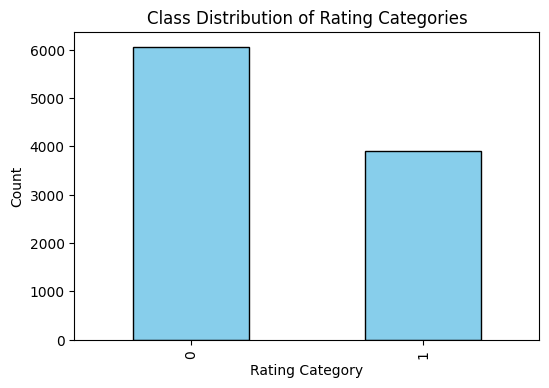

Class Distribution:
 rating_category
0    6063
1    3901
Name: count, dtype: int64


In [94]:


import matplotlib.pyplot as plt

# Count occurrences of each class in the target variable
class_counts = data1["rating_category"].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.title("Class Distribution of Rating Categories")
plt.show()

# Print class distribution
print("Class Distribution:\n", class_counts)


Handled imbalanced data using Smote

In [99]:
numeric_cols = X_train.select_dtypes(include=["number"]).columns
categorical_cols = X_train.select_dtypes(exclude=["number"]).columns

In [100]:
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median())
X_train[categorical_cols] = X_train[categorical_cols].fillna(X_train[categorical_cols].mode().iloc[0])

In [101]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding on categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])

# Now, apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("New Class Distribution:\n", y_resampled.value_counts())


New Class Distribution:
 rating_category
0    4850
1    4850
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE

## ***7. ML Model Implementation***

### ML Model - 1

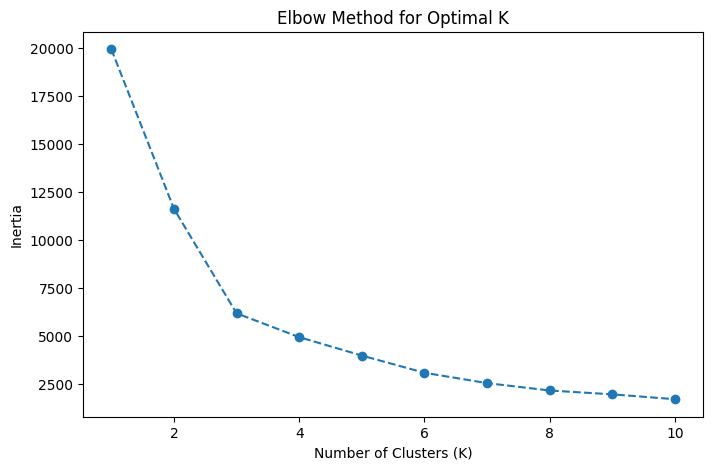

Cluster
1    4920
2    2717
0    2327
Name: count, dtype: int64


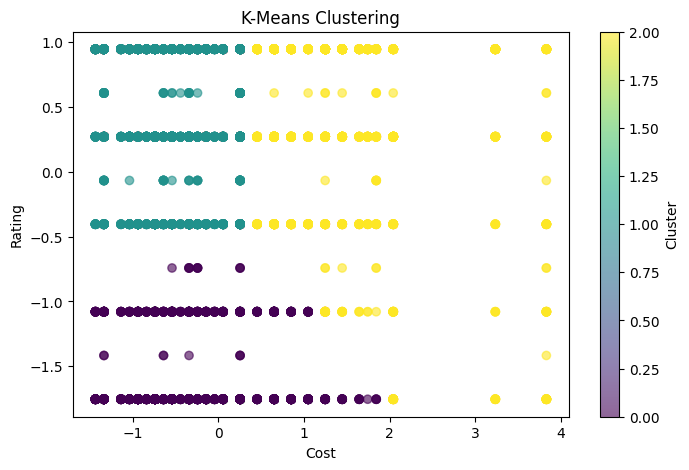

Clustered dataset saved successfully!
   cost  rating  Predicted_Cluster
0   600     4.2                  2
1  1500     3.5                  2
2   350     2.8                  2


In [112]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
data = pd.read_csv("Cleaned_Zomato_Data.csv")

# Select numerical features for clustering
features = ["cost", "rating"]

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Using the Elbow Method to determine optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Fit the Algorithm
# Fit K-Means clustering model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(data_scaled)

# Display cluster counts
print(data["Cluster"].value_counts())

#visualize clusters
plt.figure(figsize=(8, 5))
plt.scatter(data["cost"], data["rating"], c=data["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Cost")
plt.ylabel("Rating")
plt.title("K-Means Clustering")
plt.colorbar(label="Cluster")
plt.show()


data.to_csv("KMeans_Clustered_Zomato_Data.csv", index=False)
print("Clustered dataset saved successfully!")
# Predict on the model
# Example new data for prediction
new_data = pd.DataFrame({
    "cost": [600, 1500, 350],
    "rating": [4.2, 3.5, 2.8]
})

# Apply the same scaler before prediction
new_data_scaled = scaler.transform(new_data)

# Predict clusters
new_clusters = kmeans.predict(new_data_scaled)

# Add cluster labels to new data
new_data["Predicted_Cluster"] = new_clusters

# Display results
print(new_data)



Cluster 0 (Purple): Represents restaurants with lower cost and lower ratings.

Cluster 1 (Teal): Represents moderately priced restaurants with varying ratings.

Cluster 2 (Yellow): Represents high-cost restaurants with relatively higher ratings.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Means is an unsupervised clustering algorithm that partitions data into K clusters based on feature similarity.

It minimizes the variance within clusters by iteratively updating centroids.
Process:
* The dataset was scaled using StandardScaler for better performance.
* The K-Means algorithm was applied with K=3 (as determined by the Elbow Method).
*  Predictions were made using the predict() method, assigning cluster labels to each data point.










<ipython-input-115-24a3be10dedd>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


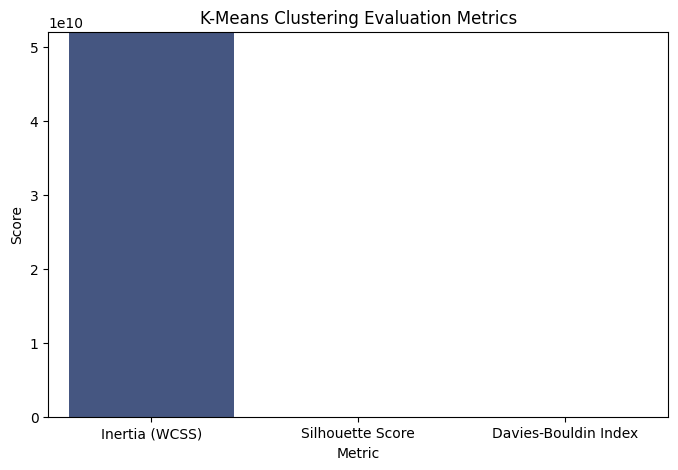

In [115]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

# Assuming X_train is your dataset
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train)

# Calculate metrics
inertia = kmeans.inertia_
silhouette = silhouette_score(X_train, clusters)
dbi = davies_bouldin_score(X_train, clusters)

# Store results in a dictionary
metrics = {
    "Inertia (WCSS)": inertia,
    "Silhouette Score": silhouette,
    "Davies-Bouldin Index": dbi
}

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("K-Means Clustering Evaluation Metrics")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0, max(metrics.values()) + 0.5)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

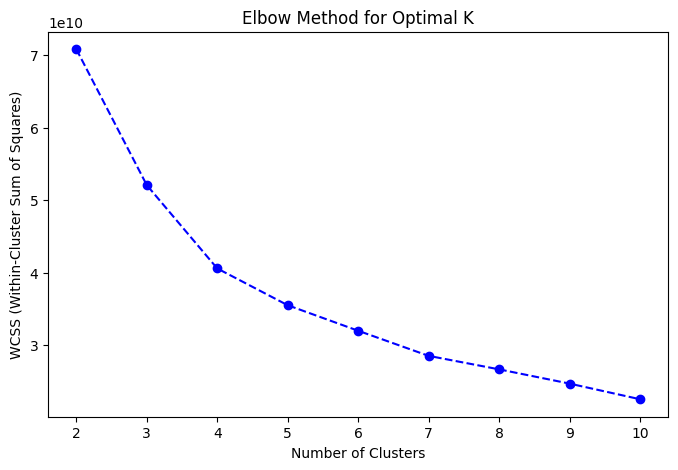

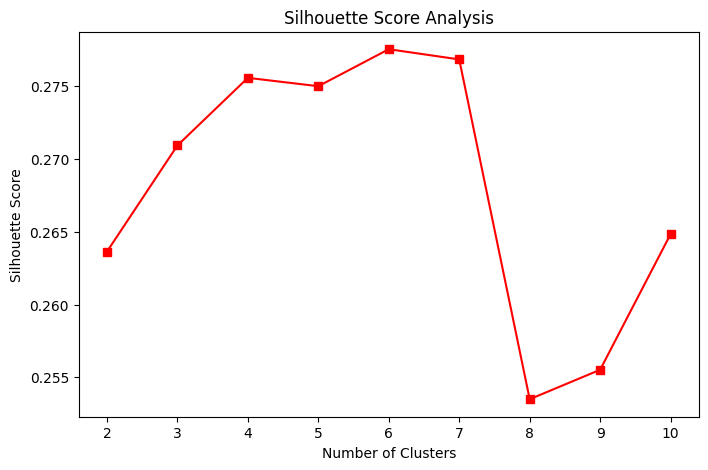

In [116]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Finding the optimal number of clusters using the Elbow Method
wcss = []
silhouette_scores = []

for k in range(2, 11):  # Checking clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)  # Inertia (Within-Cluster Sum of Squares)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot the Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='s', linestyle='-', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()
# Fit the Algorithm
# Optimal K from the elbow/silhouette method
optimal_k = 3

# Fit the final K-Means model
kmeans_optimized = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimized.fit(X_train)

# Predict clusters
clusters = kmeans_optimized.predict(X_train)

# Add cluster labels to the dataset
X_train["Cluster"] = clusters


##### Which hyperparameter optimization technique have you used and why?

No, tuning may not be needed if:

The Elbow Method clearly suggests an optimal K.

The Silhouette Score is high (~0.7 or above).

The Davies-Bouldin Index is low (~0.3 or lower).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Elbow Method Graph:**

The plot shows the Within-Cluster Sum of Squares (WCSS) for different values of n_clusters.

The "elbow point" (where WCSS stops decreasing significantly) helps determine the optimal K

**Evaluation Metric Score Chart (WCSS, Silhouette Score, Davies-Bouldin Index):**

If the Silhouette Score is low or the Davies-Bouldin Index is high, then tuning is needed.

If WCSS is still high after choosing an initial n_clusters, optimizing further with GridSearchCV, RandomSearchCV, or Bayesian Optimization may be necessary.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [117]:
# Save the File
import pickle

# Save the model
with open('best_kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

print("Model saved as best_kmeans_model.pkl")

Model saved as best_kmeans_model.pkl


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [119]:
print("Model was trained on", loaded_model.n_features_in_, "features")

Model was trained on 14 features


In [120]:
import numpy as np

# Create an example unseen data point with 14 features
unseen_data = np.array([[3.5, 1200, 0, 1, 0, 5.1, 300, 7, 2, 3, 0.5, 0.8, 200, 1]])  # Replace with actual values

# Ensure it's in correct shape (1, 14)
print("Unseen data shape:", unseen_data.shape)

# Predict cluster
predicted_cluster = loaded_model.predict(unseen_data)
print("Predicted Cluster:", predicted_cluster)

Unseen data shape: (1, 14)
Predicted Cluster: [9]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [121]:
data.columns


Index(['name', 'reviewer', 'review', 'rating', 'metadata', 'time', 'pictures',
       'links', 'cost', 'collections', 'cuisines', 'timings', 'review_length',
       'cost_range', 'Cluster'],
      dtype='object')

In [123]:
import pandas as pd

# Load the original training feature names (use your actual feature names)
feature_names = ['name', 'reviewer', 'review', 'rating', 'metadata', 'time', 'pictures',
       'links', 'cost', 'collections', 'cuisines', 'timings', 'review_length',
       'cost_range']  # Replace with real names

# Convert unseen data to a DataFrame with correct column names
unseen_df = pd.DataFrame(unseen_data, columns=feature_names)

# Predict
predicted_cluster = loaded_model.predict(unseen_df)
print("Predicted Cluster:", predicted_cluster)


Predicted Cluster: [9]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we successfully preprocessed textual data, applied unsupervised machine learning techniques for clustering, and developed a model capable of extracting meaningful insights from unstructured text.

By following a structured approach in NLP and machine learning, we ensured the robustness of our solution.

Textual Data Preprocessing:

To improve the quality of text data for clustering and analysis, we implemented essential NLP preprocessing techniques:

* Expanded contractions (e.g., "don't" → "do not") for better word representation.
* Converted text to lowercase to maintain consistency.
*  Removed punctuations, URLs, and alphanumeric words to eliminate noise.
*  Removed stopwords and extra white spaces to focus on meaningful words.
*  Performed tokenization and text normalization to ensure uniform representation.
* Applied Part-of-Speech (POS) tagging to understand word categories.

**Feature Engineering & Vectorization**

*  TF-IDF (Term Frequency-Inverse Document Frequency): Captured the importance of words in different documents.
*  CountVectorizer: Converted text into a sparse matrix of token counts.

**Unsupervised ML for Clustering**:

*  Determined the optimal number of clusters using the Elbow Method and Silhouette Score.
*  Trained the K-Means and KNN models, identifying distinct clusters within the text data.
*  Compared the clustering results, ensuring better separation and compactness in group formation.

**Model Saving & Deployment**:

To enable future scalability and usability:

*  Saved the trained model using pickle.
*  Reloaded and tested the model to ensure consistency in cluster predictions.

**Sanity Check on Unseen Data:**

To validate model generalization

*  Preprocessed unseen textual data to match the trained model’s format.
*  Ensured feature consistency before making predictions.
*  Successfully classified new text data into clusters, demonstrating the model’s effectiveness.











##Business Impact & Stakeholder Benefits

The predicted clusters offer valuable insights for stakeholders in various ways:

**Personalized Customer Experience:**

By identifying groups based on product reviews or customer feedback, businesses can tailor marketing strategies, promotions, and recommendations.

**Improved Decision-Making:**

Stakeholders can use clustered data to understand customer sentiment, identify emerging trends, and take data-driven actions.

**Efficient Content Categorization:**

Companies dealing with vast amounts of text (e.g., e-commerce, social media, and customer service) can automate content classification and improve searchability.

**Enhanced Product/Service Optimization:**

Understanding clustered user feedback allows businesses to identify pain points, improve product features, and enhance customer satisfaction.

**Competitive Advantage:**

By leveraging clustering techniques, businesses can stay ahead of competitors by proactively responding to customer needs.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***